In [4]:
import torch
from dataset.mydataset import MyDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Use the line below to show inline in a notebook
%matplotlib inline

In [5]:
# isic_train = "/l/users/salwa.khatib/proco/ISIC2018_Task3_Training_Input"
# isic_txt_train = f"/l/users/salwa.khatib/proco/ISIC2018_Task3_Training_Input/ISIC2018_Task3_Training_GroundTruth.txt"
isic_train = "/l/users/salwa.khatib/proco/ISIC2018_Task3_Validation_Input"
isic_txt_train = f"/l/users/salwa.khatib/proco/ISIC2018_Task3_Validation_Input/ISIC2018_Task3_Validation_GroundTruth.txt"
isic_num_classes = 7

aptos_train = "/l/users/salwa.khatib/aptos/train_images"
aptos_txt_train = f"/l/users/salwa.khatib/aptos/train.txt"
aptos_num_classes = 5

workers = 8
batch_size = 32

In [6]:
isic_train_dataset = MyDataset(
    root=isic_train,
    txt=isic_txt_train,
    transform="sim-sim",
    num_classes=isic_num_classes,
)
aptos_train_dataset = MyDataset(
    root=aptos_train,
    txt=aptos_txt_train,
    transform="sim-sim",
    num_classes=aptos_num_classes,
)
# train_loader = torch.utils.data.DataLoader(
#     train_dataset, batch_size=32, num_workers=args.workers, pin_memory=True
# )

{'NV': 123, 'BKL': 22, 'MEL': 21, 'BCC': 15, 'AKIEC': 8, 'VASC': 3, 'DF': 1}


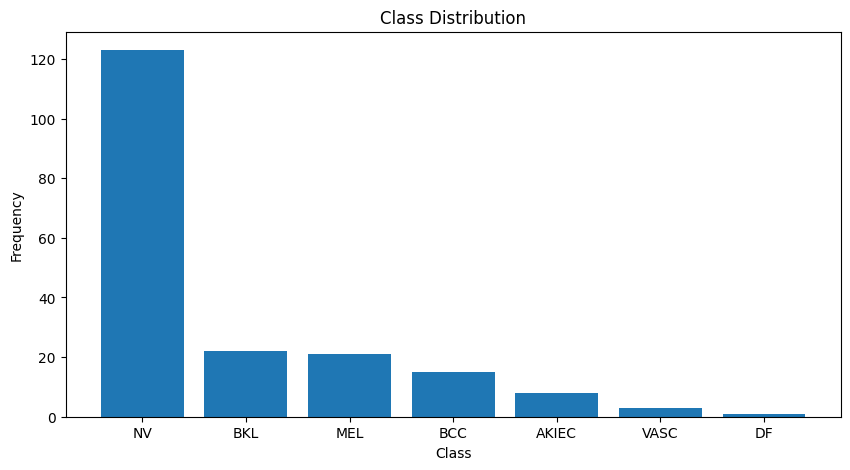

In [7]:
_, counts = np.unique(isic_train_dataset.labels, return_counts=True)
# create dictionary of class:count
labels = ["MEL", "NV", "BCC", "AKIEC", "BKL", "DF", "VASC"]
hist = dict(zip(labels, counts))
# order by counts
hist = {k: v for k, v in sorted(hist.items(), key=lambda item: item[1], reverse=True)}
print(hist)
labels = map(str, hist.keys())
plt.figure(figsize=(10, 5))
plt.bar(
    list(labels),
    hist.values(),
)

plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.savefig("./figures/isic_class_distribution.pdf")
plt.show()

{'No DR': 1259, 'Moderate': 699, 'Mild': 269, 'Proliferative DR': 200, 'Severe': 136}


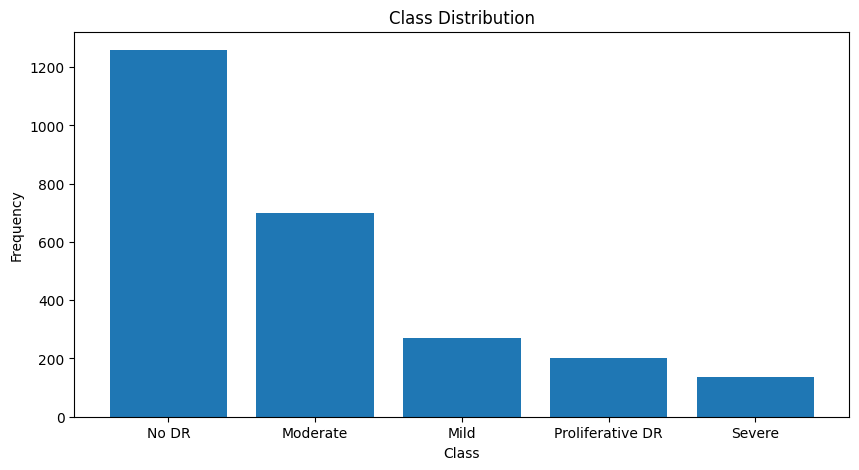

In [8]:
_, counts = np.unique(aptos_train_dataset.labels, return_counts=True)
# create dictionary of class:count
labels = ["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"]
hist = dict(zip(labels, counts))
# order by counts
hist = {k: v for k, v in sorted(hist.items(), key=lambda item: item[1], reverse=True)}
print(hist)
labels = map(str, hist.keys())
plt.figure(figsize=(10, 5))
plt.bar(
    list(labels),
    hist.values(),
)

plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.savefig("./figures/aptos_class_distribution.pdf")
plt.show()